# Does our implementation of CCA work?

**This notebook explores:** How well does our implementation of deep CCA work on small, linear and nonlinear problems with and without L1 regularization? The upshot is that in these simple scenarios, deep CCA _works_.

Importantly, we are not solving the problem analytically but using optimization: minimizing the cosine distance between mean-centered paired samples is equivalent to maximizing the Pearson's correlation coefficient.

In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import plotutils
import exploader

/Users/gwg/local/dmcm


# Paired datasets with a linear relationship

The data below are perfectly correlated. I generated a random X1 dataset then generated X2 by a matrix multiplication plus bias offset for every sample. In other words, the data are perfectly correlated through a single linear transformation.

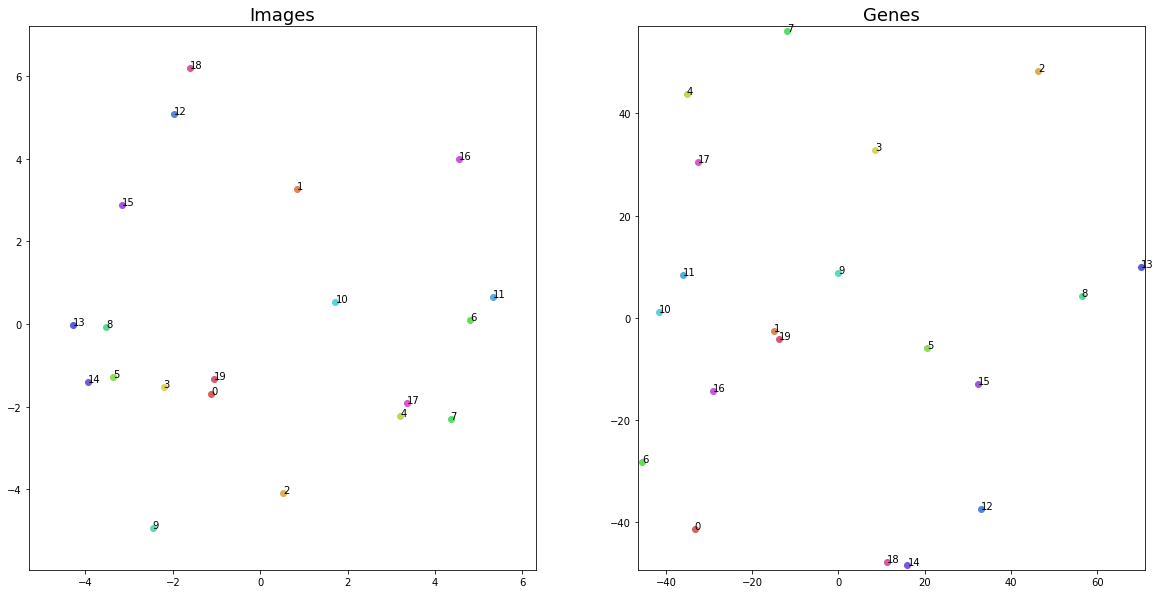

In [2]:
from data import PerfCorrConfig, PerfCorrDataset
dataset = PerfCorrDataset(PerfCorrConfig())
plotutils.plot_both_embeddings([dataset.X1, dataset.X2])

# CCA on "linear dataset"

Our implementation of CCA—in this case, the model has no nonlinearities—completely captures the high-dimensional relationship.

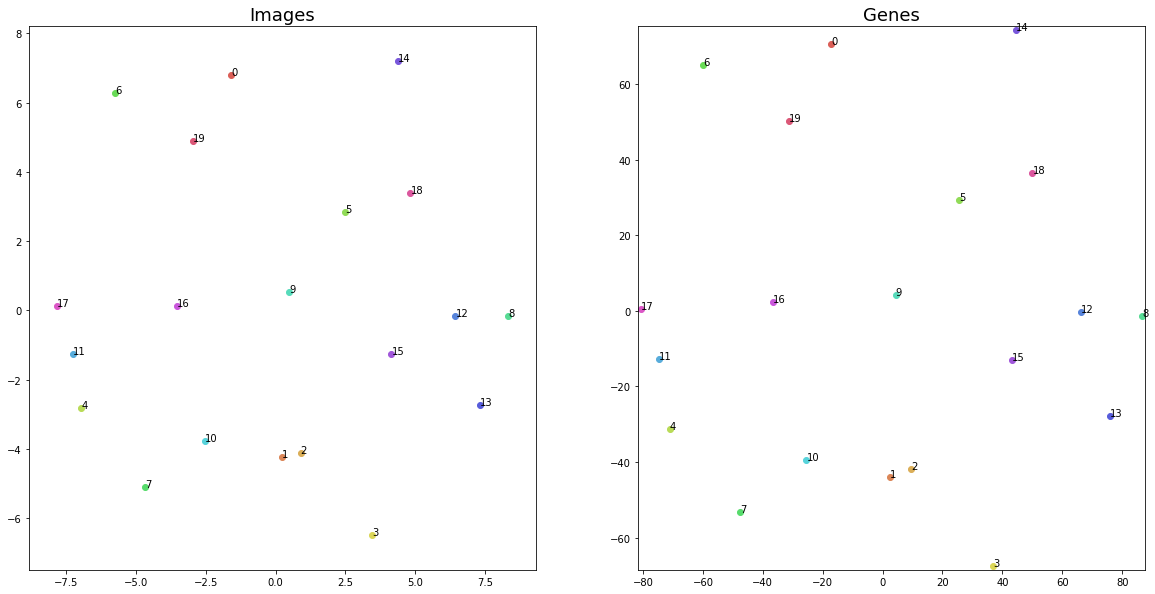

In [3]:
directory = '/20180407_perfcorr_cca/perfcorr_lr-0.001'
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2])

# Paired datasets with a nonlinear relationship

The data below are perfectly correlated but through a nonlinear transformation. I generated a random X1 dataset then generated X2 by taking the 4-th power of every sample, i.e.:

```
X2_i = (X1_i)^4
```

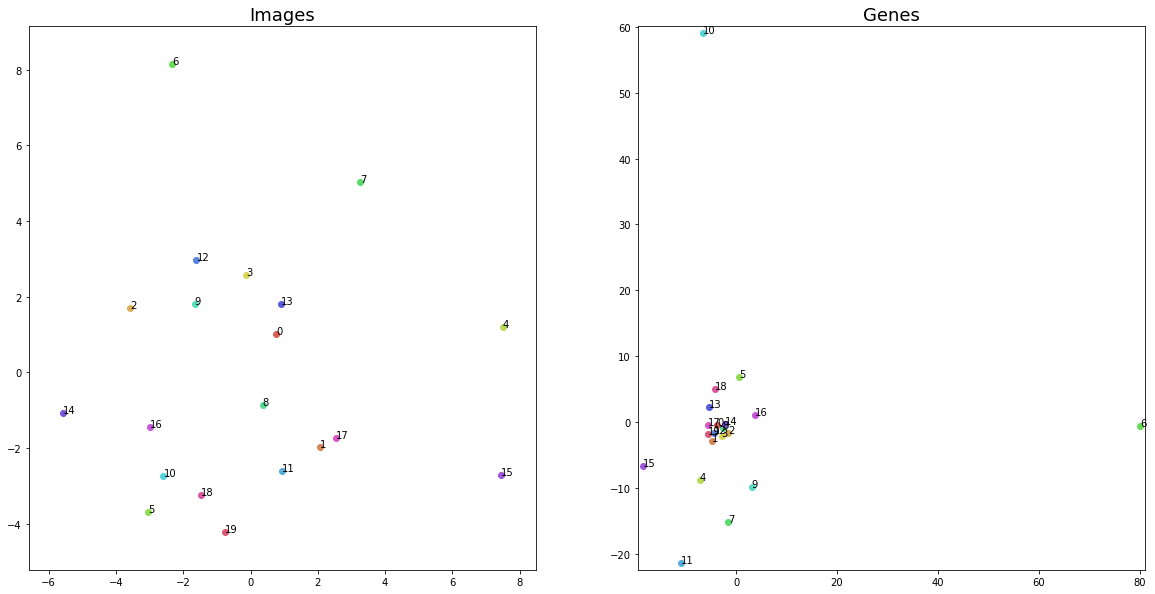

In [4]:
from data import NonlinCorrConfig, NonlinCorrDataset
dataset = NonlinCorrDataset(NonlinCorrConfig())
plotutils.plot_both_embeddings([dataset.X1, dataset.X2])

# CCA on "nonlinear dataset"

Again, our implementation of CCA completely captures the high-dimensional relationship. Again, the model has no nonlinearities but can capture the nonlinear relationship. This is not surprising, since we expect that a model with enough capacity can simply memorize the dataset, e.g. the embeddings are just one-hot vectors.

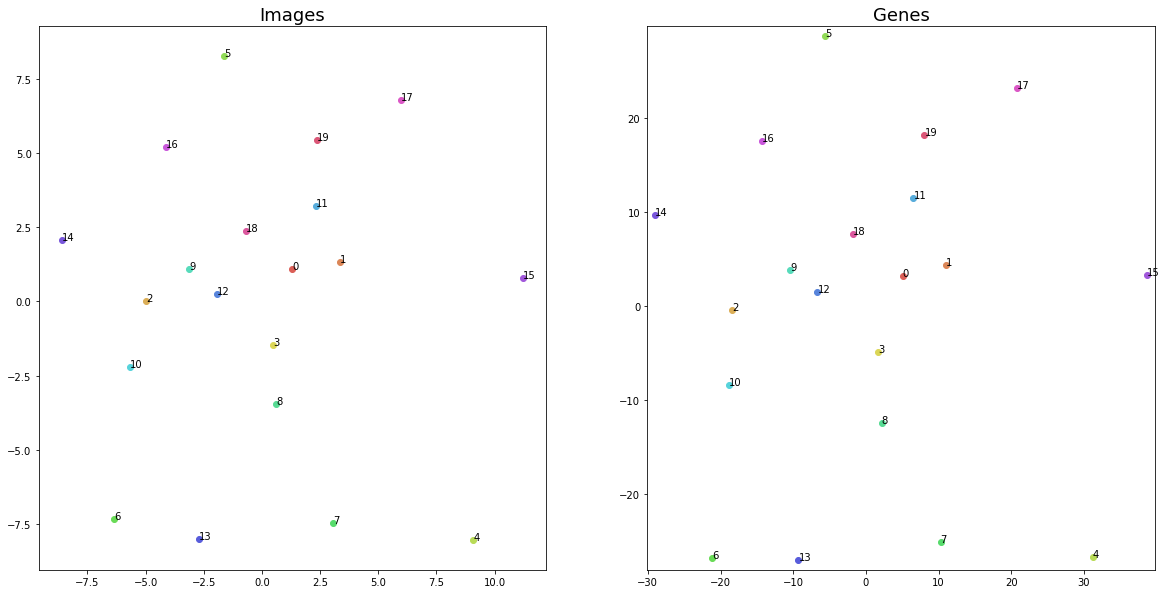

In [5]:
directory = '20180407_nonlincorr_cca/nonlincorr_lr-0.001'
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2])

# CCA on "nonlinear dataset" + L1 penalty

How does the L1 penalty effect CCA?

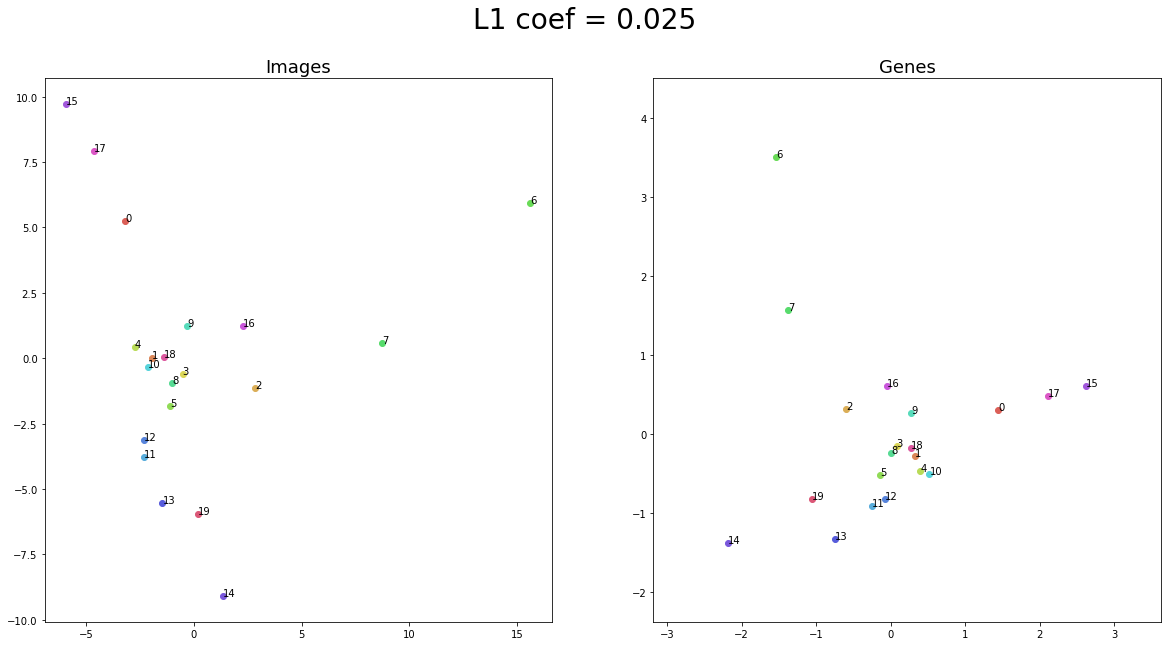

In [6]:
directory = '20180407_nonlincorr_cca/nonlincorr_l1_coef-%s_lr-0.001' % 0.025
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2], suptitle='L1 coef = 0.025')

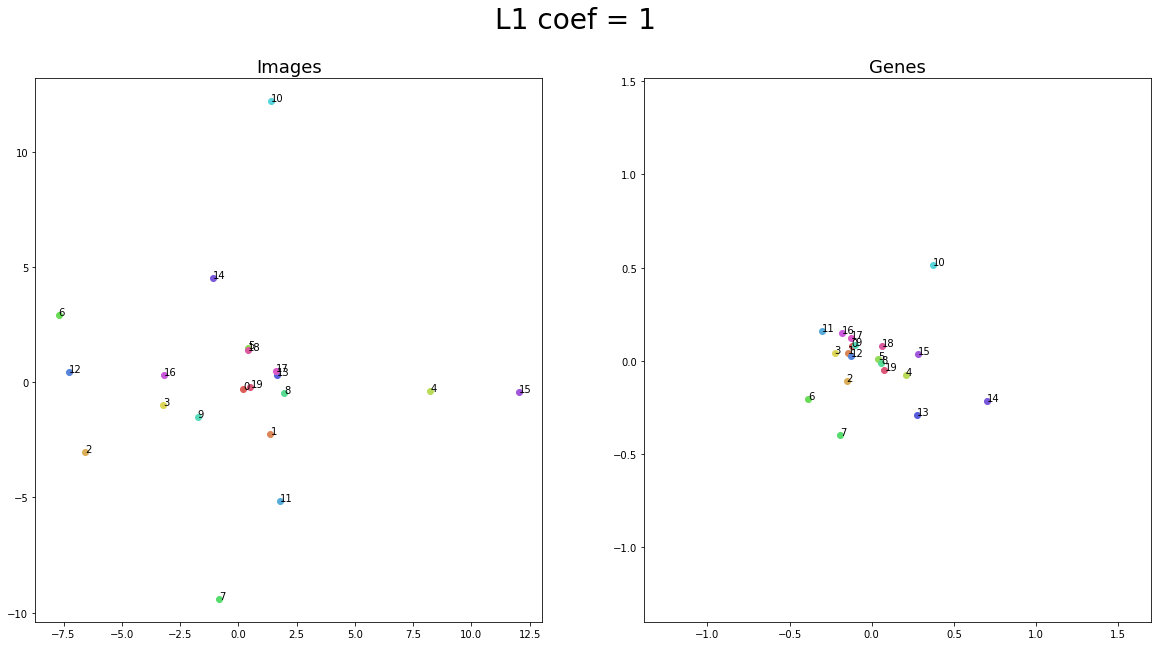

In [7]:
directory = '20180407_nonlincorr_cca/nonlincorr_l1_coef-%s_lr-0.001' % 1
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2], suptitle='L1 coef = 1')

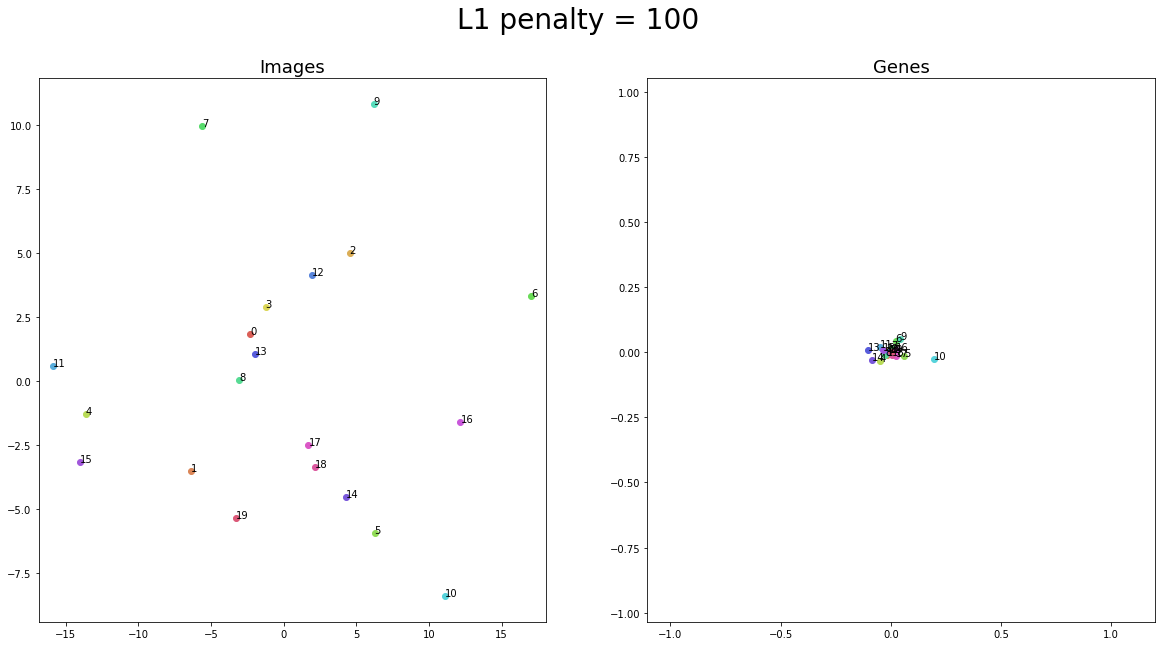

In [8]:
directory = '20180407_nonlincorr_cca/nonlincorr_l1_coef-%s_lr-0.001' % 100
Z1, Z2    = exploader.load_embeddings(directory)
plotutils.plot_both_embeddings([Z1, Z2], suptitle='L1 penalty = 100')